In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
from citipy import citipy

In [7]:
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        # Log the URL, record, and set numbers and the city.
       
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | san jose
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | kamloops
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | maldonado
Processing Record 12 of Set 1 | longlac
City not found. Skipping...
Processing Record 13 of Set 1 | puerto colombia
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | sauda
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | nizhneyansk
City not found. Skipping...
Pro

Processing Record 36 of Set 4 | port shepstone
Processing Record 37 of Set 4 | mbini
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | vaini
Processing Record 40 of Set 4 | farafangana
Processing Record 41 of Set 4 | empalme
Processing Record 42 of Set 4 | xichang
Processing Record 43 of Set 4 | san cristobal
Processing Record 44 of Set 4 | balaka
Processing Record 45 of Set 4 | clonmel
Processing Record 46 of Set 4 | kalmunai
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | llandrindod wells
Processing Record 49 of Set 4 | baker city
Processing Record 50 of Set 4 | abu dhabi
Processing Record 1 of Set 5 | bereda
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | kamiiso
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | bambous virieux
Processing Record 7 of Set 5 | chilca
Processing Record 8 of Set 5 | arcata
Processing R

Processing Record 31 of Set 8 | manggar
Processing Record 32 of Set 8 | bilibino
Processing Record 33 of Set 8 | sawakin
Processing Record 34 of Set 8 | dois vizinhos
Processing Record 35 of Set 8 | cedar hill
Processing Record 36 of Set 8 | nola
Processing Record 37 of Set 8 | beloha
Processing Record 38 of Set 8 | santa quiteria
Processing Record 39 of Set 8 | voloshka
Processing Record 40 of Set 8 | worthington
Processing Record 41 of Set 8 | sept-iles
Processing Record 42 of Set 8 | chumikan
Processing Record 43 of Set 8 | terra nova
Processing Record 44 of Set 8 | fianarantsoa
Processing Record 45 of Set 8 | broken hill
Processing Record 46 of Set 8 | santa cruz
Processing Record 47 of Set 8 | alta floresta
Processing Record 48 of Set 8 | esmeraldas
Processing Record 49 of Set 8 | henties bay
Processing Record 50 of Set 8 | shimoda
Processing Record 1 of Set 9 | nabire
Processing Record 2 of Set 9 | raymond
Processing Record 3 of Set 9 | rochegda
Processing Record 4 of Set 9 | val

Processing Record 21 of Set 12 | asosa
Processing Record 22 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 23 of Set 12 | sechura
Processing Record 24 of Set 12 | kysyl-syr
Processing Record 25 of Set 12 | aksu
Processing Record 26 of Set 12 | saquena
Processing Record 27 of Set 12 | ribas do rio pardo
Processing Record 28 of Set 12 | sisimiut
Processing Record 29 of Set 12 | alekseyevsk
Processing Record 30 of Set 12 | chalan
Processing Record 31 of Set 12 | syamzha
Processing Record 32 of Set 12 | cedar city
Processing Record 33 of Set 12 | bathsheba
Processing Record 34 of Set 12 | waw
Processing Record 35 of Set 12 | samusu
City not found. Skipping...
Processing Record 36 of Set 12 | flin flon
Processing Record 37 of Set 12 | avanigadda
Processing Record 38 of Set 12 | camopi
Processing Record 39 of Set 12 | skjervoy
Processing Record 40 of Set 12 | cabo san lucas
Processing Record 41 of Set 12 | araouane
Processing Record 42 of Set 12 | bartica
Processi

In [11]:
len(city_data)

575

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Jose,37.3394,-121.8950,80.89,54,0,4.00,US,2022-07-20 03:02:59
1,Saldanha,-33.0117,17.9442,53.44,76,0,14.47,ZA,2022-07-20 03:06:08
2,Vila Velha,-20.3297,-40.2925,68.95,94,0,2.30,BR,2022-07-20 03:06:08
3,Kamloops,50.6665,-120.3192,81.75,45,1,2.33,CA,2022-07-20 03:02:49
4,San Patricio,28.0170,-97.5169,84.29,75,0,19.17,US,2022-07-20 03:06:09
5,Dikson,73.5069,80.5464,46.90,68,100,11.83,RU,2022-07-20 03:06:10
6,Ushuaia,-54.8000,-68.3000,30.11,98,100,2.55,AR,2022-07-20 03:03:43
7,Port Lincoln,-34.7333,135.8667,52.41,56,61,14.70,AU,2022-07-20 03:06:11
8,Puerto Ayora,-0.7393,-90.3518,67.55,98,50,4.00,EC,2022-07-20 03:06:12
9,Maldonado,-34.6667,-54.9167,45.23,91,2,6.55,UY,2022-07-20 03:03:26


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Jose,US,2022-07-20 03:02:59,37.3394,-121.8950,80.89,54,0,4.00
1,Saldanha,ZA,2022-07-20 03:06:08,-33.0117,17.9442,53.44,76,0,14.47
2,Vila Velha,BR,2022-07-20 03:06:08,-20.3297,-40.2925,68.95,94,0,2.30
3,Kamloops,CA,2022-07-20 03:02:49,50.6665,-120.3192,81.75,45,1,2.33
4,San Patricio,US,2022-07-20 03:06:09,28.0170,-97.5169,84.29,75,0,19.17


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

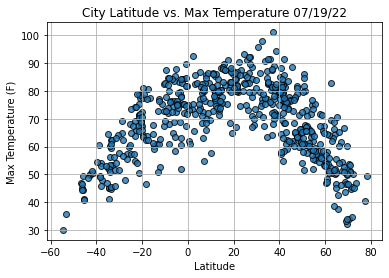

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

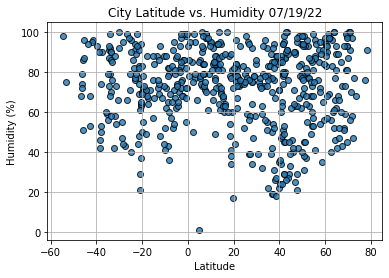

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

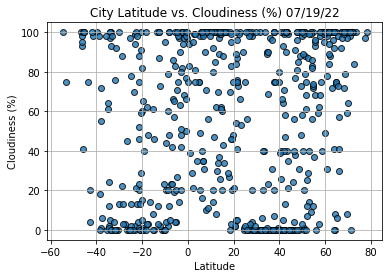

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

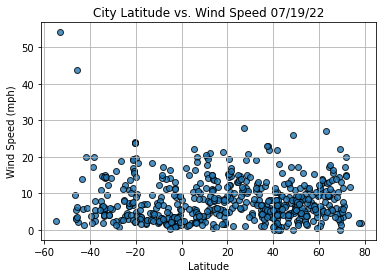

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [30]:
#import linregress 
from scipy.stats import linregress

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Jose,US,2022-07-20 03:02:59,37.3394,-121.8950,80.89,54,0,4.00
3,Kamloops,CA,2022-07-20 03:02:49,50.6665,-120.3192,81.75,45,1,2.33
4,San Patricio,US,2022-07-20 03:06:09,28.0170,-97.5169,84.29,75,0,19.17
5,Dikson,RU,2022-07-20 03:06:10,73.5069,80.5464,46.90,68,100,11.83
10,Puerto Colombia,CO,2022-07-20 03:02:47,10.9878,-74.9547,81.23,84,80,19.93


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [55]:
from scipy.stats import linregress
        
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

 

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        (slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
        regress_values = (x_values * slope) + intercept
        
        line_eq = "y=" + str(round(slope,2)) + " x + " + str(round(intercept,2))
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        
        plt.annotate(line_eq,text_coordinates,fontsize = 15, color = "r")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()
# Call the function.
   


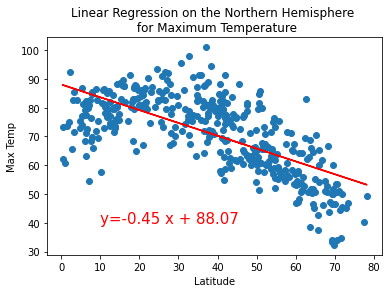

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

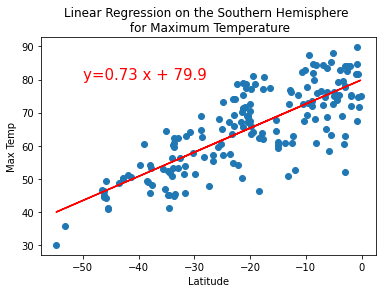

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

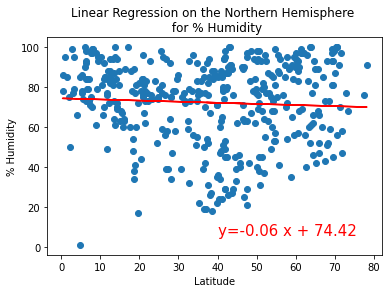

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,6))

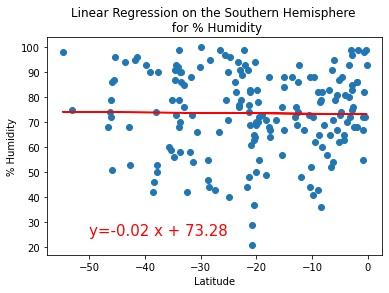

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))

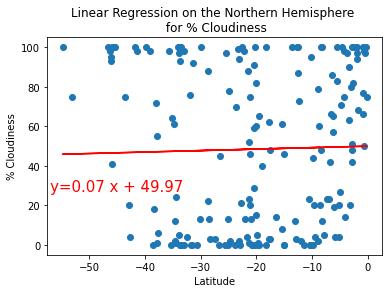

In [100]:
#skill drill attempt, linar regression on percent cloudiness in nortern hemi 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,27))

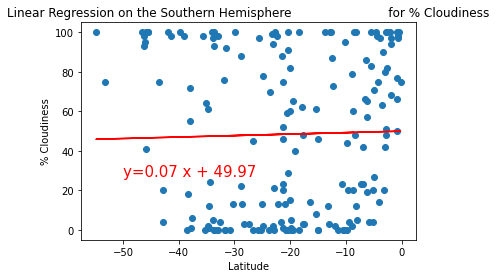

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,27))

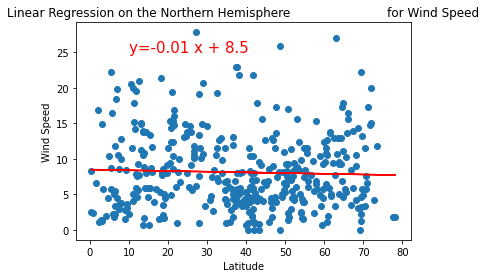

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

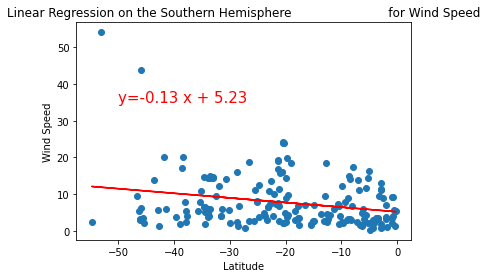

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))